In [32]:
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

# 컴퓨터에 이미 깔린 한글 폰트 적용하면 됨.
plt.rcParams['font.family'] = 'Malgun Gothic'
%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False

# 설치된 폰트 중 한글 지원하는 폰트 찾기 : Nanum이나 Gothic 등 검색
# import matplotlib.font_manager as fm
# font_list = [font.name for font in fm.fontManager.ttflist]
# for f in font_list:
#     if 'Gothic' in f:
#         print(f)

다음은 붓꽃 데이터 중 버지니카(virginica)와 베르시칼라(versicolor) 종의 데이터만 임포트하는 코드다.

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()
idx = np.in1d(iris.target, [1, 2])          # 앞의 array의 값이 뒤의 array 값들 중에 포함이 되는지 판별하는 함수 : true/false  -- 즉, target값이 1이나 2 값을 갖는 row만 선택하기 위한 indexing.
X = iris.data[idx, :]
y = iris.target[idx]
df = pd.DataFrame(X, columns=iris.feature_names)
df["species"] = iris.target[idx]
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
95,6.7,3.0,5.2,2.3,2
96,6.3,2.5,5.0,1.9,2
97,6.5,3.0,5.2,2.0,2
98,6.2,3.4,5.4,2.3,2
99,5.9,3.0,5.1,1.8,2


C:\Python\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python\Python37\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Python\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Python\Python37\lib\site-packages\seaborn\distributions.py:2056: Future

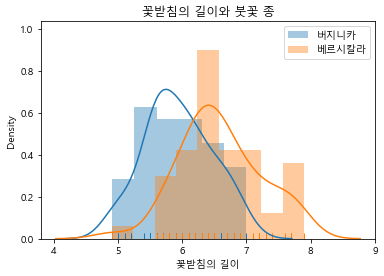

In [11]:
sns.distplot(df[df.species == 1]["sepal length (cm)"], hist=True, rug=True, label="버지니카")
sns.distplot(df[df.species == 2]["sepal length (cm)"], hist=True, rug=True, label="베르시칼라")
plt.legend()
plt.xlabel("꽃받침의 길이")
plt.title("꽃받침의 길이와 붓꽃 종")
plt.show()

In [25]:
max = df.iloc[:,0].max()
min = df.iloc[:,0].min()
print(max, min)
df

7.9 4.9


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,7.0,3.2,4.7,1.4,1
1,6.4,3.2,4.5,1.5,1
2,6.9,3.1,4.9,1.5,1
3,5.5,2.3,4.0,1.3,1
4,6.5,2.8,4.6,1.5,1
...,...,...,...,...,...
95,6.7,3.0,5.2,2.3,2
96,6.3,2.5,5.0,1.9,2
97,6.5,3.0,5.2,2.0,2
98,6.2,3.4,5.4,2.3,2


In [35]:
def cond_entropy(v):
    pYX0 = v[0, :] / np.sum(v[0, :])
    pYX1 = v[1, :] / np.sum(v[1, :])
    HYX0 = sp.stats.entropy(pYX0, base=2)
    HYX1 = sp.stats.entropy(pYX1, base=2)
    HYX = np.sum(v, axis=1) @ [HYX0, HYX1] / np.sum(v)
    print("HYX : ", HYX)
    return HYX

def calculate_entropy(df, thres):
    df['determine'] = df['sepal length (cm)'] > thres
    pivot_table = df.groupby(["determine", "species"]).size().unstack().fillna(0)
    print(pivot_table)
    return cond_entropy(pivot_table.values)

grid = np.array(range(int(min*20), int(max*20) + 1, 1)) / 20
entropies = []
for thres in grid:
    print("thres : ", thres)
    entropies.append(calculate_entropy(df, thres))
print(entropies)

thres :  4.9
species     1   2
determine        
False       1   1
True       49  49
thres :  4.95
species     1   2
determine        
False       1   1
True       49  49
thres :  5.0
species     1   2
determine        
False       3   1
True       47  49
thres :  5.05
species     1   2
determine        
False       3   1
True       47  49
thres :  5.1
species     1   2
determine        
False       4   1
True       46  49
thres :  5.15
species     1   2
determine        
False       4   1
True       46  49
thres :  5.2
species     1   2
determine        
False       5   1
True       45  49
thres :  5.25
species     1   2
determine        
False       5   1
True       45  49
thres :  5.3
species     1   2
determine        
False       5   1
True       45  49
thres :  5.35
species     1   2
determine        
False       5   1
True       45  49
thres :  5.4
species     1   2
determine        
False       6   1
True       44  49
thres :  5.45
species     1   2
determine        
False     

IndexError: index 1 is out of bounds for axis 0 with size 1